In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [2]:
path = './data/dataset.csv'
df = pd.read_csv(path)
df.columns = ['id','class','tweet']
df.head()

,id,class,tweet
0,2,0,b'ok time to start rolling the banners and som...
1,3,0,"b""fancis moves into a different plane at age 3..."
2,4,0,b'Elmer via @comiXology Out now digital Frenc...
3,5,0,b'[needrestart] Thomas Liske - Release versio...
4,6,0,b'Webinar with Landatel for Spanish customers ...


In [3]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

In [4]:
import re
def clean(text):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text).split()).lower()

In [5]:
from sklearn.utils import shuffle

df = shuffle(df)
x_data = df['tweet']
y_data = df['class']

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(max_features = 5000)
x_data = list(x_data)
x_data = tv.fit_transform(x_data).toarray()

In [17]:
print(df['tweet'][:10])
print(x_data[:10])

5689     b'@justinbieber Merry Chrismas Justin &lt;3 lO...
50081    b"@MikeyDelap @SkySports @WhoScored I'm sure t...
51461    b'Josh McNown woulda had 4 TDs by now and Ditk...
16213    b'Handmade Emerald Green and Yellow Jade Frame...
15204    b'58  RT to vote for our favorite show.\n\nCas...
46377    b'What nice mates I have..phone me at the @Uni...
16150    b'Just saw a girl wearing a bag that said "Shu...
12979    b'Mon, 16 Dec 2013, let us all send Joe Absolo...
17183    b"I'm at Starom\xc4\x9bstsk\xc3\xa9 n\xc3\xa1m...
71773    @ehowe55: @DJZEE3 hope you made it back across...
Name: tweet, dtype: object
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


b'ok time to start rolling the banners and some rough packing/preparing things =w='


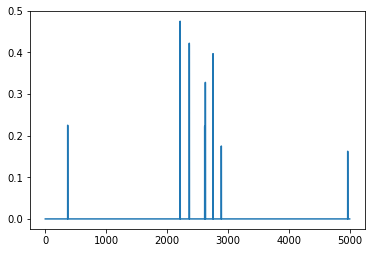

In [22]:
print(df['tweet'][0])
plt.plot(x_data[0])

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data,y_data,test_size=0.3,random_state=0)
print(len(x_train), len(y_train))

53758 53758


In [8]:
lsvc = LinearSVC()
lsvc.fit(x_train,y_train)
train_scores = lsvc.score(x_train, y_train)
test_scores = lsvc.score(x_test, y_test)
print(train_scores,test_scores)
y_pred = lsvc.predict(x_test)

0.9998325830574054 0.9996961805555555


In [9]:
print(np.array(y_test)[:15])
print(y_pred[:15])

[1 0 0 0 1 0 0 1 0 0 0 1 0 1 0]
[1 0 0 0 1 0 0 1 0 0 0 1 0 1 0]


In [10]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)
train_scores = gnb.score(x_train, y_train)
test_scores = gnb.score(x_test, y_test)
print(train_scores,test_scores)
y_pred = gnb.predict(x_test)

0.7685925815692548 0.7648003472222222


In [11]:
print(np.array(y_test)[:15])
print(y_pred[:15])

[1 0 0 0 1 0 0 1 0 0 0 1 0 1 0]
[1 0 1 1 1 0 1 1 1 0 1 0 0 1 0]


In [12]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
train_scores = lr.score(x_train, y_train)
test_scores = lr.score(x_test, y_test)
print(train_scores,test_scores)
y_pred = lr.predict(x_test)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9993303322296216 0.9989583333333333


In [13]:
print(np.array(y_test)[:15])
print(y_pred[:15])

[1 0 0 0 1 0 0 1 0 0 0 1 0 1 0]
[1 0 0 0 1 0 0 1 0 0 0 1 0 1 0]


In [14]:
rfc = RandomForestClassifier(n_estimators = 10, random_state = 0)
rfc.fit(x_train,y_train)
train_scores = rfc.score(x_train, y_train)
test_scores = rfc.score(x_test, y_test)
print(train_scores,test_scores)
y_pred = rfc.predict(x_test)

0.999962796234979 0.9983506944444445


In [15]:
print(np.array(y_test)[:15])
print(y_pred[:15])

[1 0 0 0 1 0 0 1 0 0 0 1 0 1 0]
[1 0 0 0 1 0 0 1 0 0 0 1 0 1 0]
